In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine
from numpy import mean

In [3]:
#subject 1, create a list for each experimental prompt
#prompt1
s1p1 = ["wholesome friendship", "drinking tea on the couch", "tea digital art", "tea digtial art", "cup of tea in the window while it is raining, warm colors","Cup of tea in the window while it is raining, warm colors, cute style", "Cup of tea in the window while it is raining, warm colors, crayons", "Cup of tea in the window while it is raining, pink background in crayon"]
#prmopt2
s1p2 = ["Shiny popstar performing to a group of puppies","Shiny popstar performing to a group of puppies in a cute style","Shiny popstar performing to a group of puppies in anime style","Superhero dog flying through space on a skateboard, digital art","Rubber duck in a suit front of a landscape in vaporwave"]
#prompt3
s1p3 = ["Cosy french cafe in the 1950s, realistic","Hot desert with cactus and umbrella","Hot desert with cacti and umbrella","Hot desert oasis with cacti with pool with parasol"]
#all together
s1 = s1p1+s1p2+s1p3
#############################################################
#subject 2
#prompt1
s2p1 = ["A cute cat and a panda swimming in the ocean with a lot of octopuses","A cute cat and a panda swimming in the ocean with a lot of octopuses having a tea party","A cute cat and a panda swimming in the ocean with a lot of octopuses oil painting style","A cute cat and a panda at the beach with a lot of octopus oil painting"]
#prompt2
s2p2 = ["Creative album cover for indie pop band", "Group of angsty teenagers","Driving down highway with a guitar car","Driving down highway with a guitar car with bunch of ghosts at sunset"]
#prompt3
s2p3=["A festive birthday celebration with a bunch of lonely sad animals pretending to be happy cartoon style","A festive birthday celebration with a bunch of lonely sad animals pretending to be happy watercolor style"]
#all together
s2 = s2p1+s2p2+s2p3
#############################################################
#subject 3
#prompt1
s3p1 = ["Cosy living room with candles and blankets, oil painting","Cosy living room with candles and blankets, somebody sitting in an armchair, feeling at peace and well, oil painting","Cosy living room with candles and blankets. a child sitting in an armchair feeling at peace and well, oil painting","Cosy living room with a secure child sitting in an armchair feeling at peace with a blanket over its legs, oil painting","Cosy and warm living room, with a child sitting in an armchair feeling at peace and well, oil painting","Cosy and warm living room with lit candles and blankets, oil painting"]
#prompt2
s3p2 = ["Girl hiding under blankets in her bed with a torch light, reading","Girl hiding under blankets in her bed with a torch light reading. the girl imagines a fantastical world with a prince on a white horse artistic crayon","Girl hiding under blankets in her bed with a torch light reading. the girl imagines a fantastical world with a prince on a white horse watercolor","Girl hiding under blankets in her bed with a torch  light reading.there is a thought bubble above her head, with a view into a fantastical world, watercolor","Girl hiding under blankets in her bed with a torch light reading. above her head there is a view into a fantastical world, watercolor","Girl hiding under blankets with a torch light reading. In the top of the image there is view into a fantastical world, watercolor","Girl hiding under blankets with a torch light reading. In the top of the image there is view into a fantastical world, watercolor"]
#prompt3
s3p3 = ["Indie pop album cover","Indie pop album cover","Sunny landscape with a cyclist, muted colors, crayon","Playground of musical instruments, painting","Playground of musical instruments, in dali","Playground of musical instruments, in the painting style of salvador dali","Playground of musical instruments, in the painting style of salvador dali","Mellow music, in crayon"]
#all together
s3 = s3p1+s3p2+s3p3
#############################################################
#subject 4
#prompt1
s4p1 = ["Sitting in a cafe it's raining outside background music people walking by, pastel color style","Sitting in a cafe it's raining outside background music , pastel color style"]
#prompt2
s4p2 = ["happy girl walking on a rainbow made of books there are sparkling stars in the sky, colorful style","rainbow made of books there are sparkling stars in the sky, colorful style","books that are stapled like a rainbow there are sparkling stars in the sky","books that look like a rainbow there are sparkling stars in the sky","a rainbow made out of books, sparkling atmosphere, golden clouds"]
#prompt3
s4p3 = ["an analogue photography of a cow smoking a cigarette","a vintage photography of a cow smoking a cigarette","a vintage photography of a smoking cow","a cow standing on a cliff with a purple sky and shooting stars realistic style","a photograph of a cow standing on a cliff with a purple sky and shooting stars realistic style","a photograph of a purple banana lying in the grass","a photograph of a banana lying in the grass in surrealistic style","one banana laying in the grass next to a bike","a lonely bike in a busy city with traffic lights"]
#all together
s4 = s4p1+s4p2+s4p3
#############################################################
#subject 5
#prompt1
s5p1 = ["Very large empty room with no doors or windows, a small human figure in the corner, a pond in the middle with nature elements, soft shapes, bright light","Very large empty room with no doors or windows, a small human figure in the corner, with few nature elements, soft shapes, bright light","Very large empty room with no doors or windows, a small human figure in the corner,pastel colors, bright light"]
#prompt2
s5p2 = ["A girl laying on a pile of books laying on her stomach, resting her head on her arm renaissance art style","A girl laying on a pile of books laying on her stomach, resting her head on her arm renaissance art style","A girl laying on a mountain of books laying on her stomach, resting her head on her arm renaissance art style","A girl laying on a mountain of books laying on her stomach, resting her head on her arm romanticism art style","A girl laying on a mountain of books laying on her stomach, resting her head on her arm romanticism art style","A girl laying on a mountain of books laying on her stomach, resting her head on her arm romanticism art style, far away perspective","A girl laying on a mountain of books laying on her stomach, resting her head on her arm romanticism art style, far away perspective"]
#prompt3
s5p3 = ["Indie pop album cover","Indie pop album cover","Indie pop album cover","People in a shopping cart bright colors, grunge clothes, indie pop","People in a shopping cart bright colors, grunge clothes, indie pop, monochromatic background","People in a shopping cart, grunge clothes, indie pop, yellow background","People in a shopping cart, grunge clothes, indie pop, yellow background"]
s5 = s5p1+s5p2+s5p3
#############################################################
#subject 6
#prompt1
s6p1 = ["Sunrise by the water with a skyline in the background, seen through trees","Sunrise by the water with a city skyline with low skyscrapers in the background, seen from trees","Sunrise by the water with a city skyline with low skyscrapers in the background, seen from afar","Sunrise by the water with a city skyline with low skyscrapers in the background, seen from afar, near trees"]
#prompt2
s6p2 = ["Huge library seen from a corner with a girl sitting in the middle of the library reading a book surrounded by many open books on the floor","Huge library seen from a corner with a girl sitting in the middle of the library reading a book surrounded by many open books on the floor. The picture is a drawing within book","Huge library seen from a corner with a girl sitting in the middle of the library reading a book surrounded by many open books on the floor. The picture is a black ink drawing within book. This girl is wearing dark clothes and big glasses"]
#prompt3
s6p3 = ["album cover with an empty room, there are fairy lights hung up everywhere in the room and the bedding is soft and fluffy. it is in shades of pastel colors, there is a window showing a rainy street","album cover with an empty room, there are christmas lights hung up everywhere in the room and the bedding is soft and fluffy. it is a colorful room with pastel colors. there is a window and it is dark outside. there are many music vinyls lying on the floor","album cover with an empty room, there are christmas lights hung up everywhere in the room and the bedding is soft and fluffy. it is a colorful room with pastel colors. there is a window and it is dark outside. there are many music vinyls lying on the floor","album cover with an empty room, there are christmas lights behind the bed and the bedding is soft and fluffy. it is a colorful room with pastel colors. there is a window but there is no light coming through it. there are music CDs lying on the floor"]
#all together
s6 = s6p1+s6p2+s6p3

In [4]:
#list of lists
prompts_per_prompt = []
prompts_per_prompt.append(s1p1)
prompts_per_prompt.append(s1p2)
prompts_per_prompt.append(s1p3)

prompts_per_prompt.append(s2p1)
prompts_per_prompt.append(s2p2)
prompts_per_prompt.append(s2p3)

prompts_per_prompt.append(s3p1)
prompts_per_prompt.append(s3p2)
prompts_per_prompt.append(s3p3)

prompts_per_prompt.append(s4p1)
prompts_per_prompt.append(s4p2)
prompts_per_prompt.append(s4p3)

prompts_per_prompt.append(s5p1)
prompts_per_prompt.append(s5p2)
prompts_per_prompt.append(s5p3)

prompts_per_prompt.append(s6p1)
prompts_per_prompt.append(s6p2)
prompts_per_prompt.append(s6p3)


In [5]:
sentences = ["sentence one","sentence2","sentence3"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(embeddings)

[[ 0.04151642  0.09171181  0.03529435 ...  0.00416346  0.01264466
  -0.08818157]
 [ 0.02632147  0.09339213  0.03641271 ...  0.00988079 -0.03008058
  -0.10029339]
 [-0.00070711  0.06544475  0.04323661 ... -0.00569689  0.00189115
  -0.09060948]]


In [6]:
numbers = []
for sublist in prompts_per_prompt:
    # Create a SentenceTransformer model
    model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
     
     # Embed the sublist using the model
    embeddings = model.encode(sublist)
    
    # Append the embeddings to the numbers list
    numbers.append(embeddings)

In [7]:
#numbers is a list of list, where each list contains the 384 dimensional embeddings of each prompt the user made. so in number[1] there is 5 vectors, and i want to calculate
# the cosine distance between these vectors, so between the elements of this sublist
numbers[1]

array([[-0.12787494, -0.03588096,  0.07912067, ...,  0.07179885,
         0.04309393,  0.07014643],
       [-0.13110638, -0.02184837,  0.08443886, ...,  0.07661644,
         0.05980754,  0.0671528 ],
       [-0.13371758, -0.03559626,  0.07187549, ...,  0.05375799,
         0.04294814,  0.05597304],
       [ 0.02418698, -0.03314041, -0.00448419, ...,  0.01721427,
        -0.07240131,  0.03763324],
       [ 0.06128842,  0.06355178,  0.02946918, ..., -0.0500857 ,
         0.07164427,  0.09409519]], dtype=float32)

In [8]:
prompts_per_prompt[1]

['Shiny popstar performing to a group of puppies',
 'Shiny popstar performing to a group of puppies in a cute style',
 'Shiny popstar performing to a group of puppies in anime style',
 'Superhero dog flying through space on a skateboard, digital art',
 'Rubber duck in a suit front of a landscape in vaporwave']

In [15]:
len(numbers)

18

In [9]:

def cosine_distance_average(list_of_lists):
    # Initialize an empty list to store the cosine distances
    cosine_distances = []


    # Iterate over the sublists in the input list
    for sublist in list_of_lists:
        # Initialize an empty list to store the cosine distances for the current sublist
        sublist_cosine_distances = []

        # Iterate over the elements in the current sublist
        for i in range(1, len(sublist)):
            # Calculate the cosine distance between the current and previous elements
            cosine_distance = cosine(sublist[i - 1], sublist[i])

            # Append the cosine distance to the list of cosine distances for the current sublist
            sublist_cosine_distances.append(cosine_distance)
            

        # Take the average of the cosine distances for the current sublist
        sublist_average = mean(sublist_cosine_distances)

        # Append the sublist average to the list of cosine distances
        cosine_distances.append(sublist_average)

    # Return the average
    return cosine_distances
    
    


In [10]:

def cosine_distances(list_of_lists):
    # Initialize an empty list to store the cosine distances
    cosine_distances = []
    all_cosine_distances=[]


    # Iterate over the sublists in the input list
    for sublist in list_of_lists:
        # Initialize an empty list to store the cosine distances for the current sublist
        sublist_cosine_distances = []

        # Iterate over the elements in the current sublist
        for i in range(1, len(sublist)):
            # Calculate the cosine distance between the current and previous elements
            cosine_distance = cosine(sublist[i - 1], sublist[i])

            # Append the cosine distance to the list of cosine distances for the current sublist
            sublist_cosine_distances.append(cosine_distance)
            
            
        #append full list of cosine distabnces for current sublist 
        all_cosine_distances.append(sublist_cosine_distances)
        # Take the average of the cosine distances for the current sublist
        sublist_average = mean(sublist_cosine_distances)

        # Append the sublist average to the list of cosine distances
        cosine_distances.append(sublist_average)

    # Return the average
    return all_cosine_distances

In [11]:
average_distances_per_prompt = list(cosine_distance_average(numbers))


In [12]:
all_cosine_distance_values = list(cosine_distances(numbers))

In [13]:
all_cosine_distance_values

[[0.8682151883840561,
  0.5783052742481232,
  0.23105740547180176,
  0.5765817761421204,
  0.09143519401550293,
  0.11283081769943237,
  0.11485815048217773],
 [0.039834797382354736,
  0.08986532688140869,
  0.6982138752937317,
  0.6990611255168915],
 [0.7410715222358704, 0.07186758518218994, 0.27129310369491577],
 [0.104511559009552, 0.16360986232757568, 0.10170799493789673],
 [0.829829677939415, 1.016872150823474, 0.3460441827774048],
 [0.10990601778030396],
 [0.14543569087982178,
  0.1402454972267151,
  0.0922626256942749,
  0.07224416732788086,
  0.22501546144485474],
 [0.1811630129814148,
  0.036199986934661865,
  0.1024249792098999,
  0.026901841163635254,
  0.08307164907455444,
  0],
 [0,
  0.83755823969841,
  0.6828085780143738,
  0.23885822296142578,
  0.14740866422653198,
  0,
  0.5890310108661652],
 [0.0528293251991272],
 [0.1980661153793335,
  0.12322783470153809,
  0.050776124000549316,
  0.16135990619659424],
 [0.06860464811325073,
  0.045806050300598145,
  0.414715766906

In [14]:
average_distances_per_prompt

[0.36761197234903065,
 0.38174378126859665,
 0.3614107370376587,
 0.1232764720916748,
 0.7309153371800979,
 0.10990601778030396,
 0.13504068851470946,
 0.07162691156069438,
 0.3565235308238438,
 0.0528293251991272,
 0.13335749506950378,
 0.2847004793584347,
 0.08314910531044006,
 0.018841902414957683,
 0.137514462073644,
 0.05490042765935262,
 0.08768072724342346,
 0.07445011536280315]

In [15]:
averages_per_person = [np.mean(average_distances_per_prompt[i:i+3]) for i in range(0, len(average_distances_per_prompt), 3)]
# Print the averages
print(averages_per_person)

[0.37025549688509535, 0.3213659423506922, 0.1877303769664159, 0.1569624332090219, 0.07983515659968059, 0.07234375675519307]


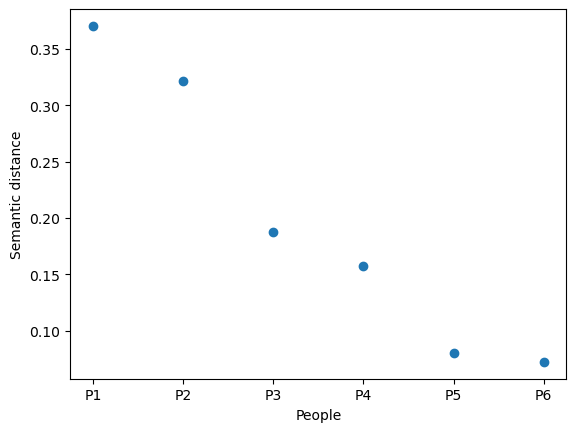

In [16]:
import matplotlib.pyplot as plt

#participants
participants = ["P1","P2","P3","P4","P5","P6"]

# Create a scatter plot of the semantic distances
plt.scatter(participants, averages_per_person)

# Add labels to the x and y axes
plt.xlabel("People")
plt.ylabel("Semantic distance")

# Show the plot
plt.show()

In [ ]:
# Define a list of the first data points for each subject
data1 = [0.36761197234903065, 0.1232764720916748,  0.13504068851470946, 0.0528293251991272, 0.08314910531044006, 0.05490042765935262]

# Define a list of the second data points for each subject
data2 = [0.38174378126859665, 0.7309153371800979, 0.07162691156069438, 0.13335749506950378, 0.018841902414957683, 0.08768072724342346]

# Define a list of the third data points for each subject
data3 = [0.3614107370376587, 0.10990601778030396, 0.3565235308238438, 0.2847004793584347, 0.137514462073644, 0.07445011536280315]

# Create a scatter plot of the first data points
plt.scatter(participants, data1, color="red", marker="o", label = "Task 1")

# Create a scatter plot of the second data points
plt.scatter(participants, data2, color="blue", marker="o", label = "Task 2")

# Create a scatter plot of the third data points
plt.scatter(participants, data3, color="green", marker="o", label = "Task 3")

# Add labels to the x and y axes
plt.xlabel("Participants")
plt.ylabel("Semantic distance")
plt.legend()

# Show the plot
plt.show()

In [20]:
#calculate avg semantic distances for each participant
p1 = mean([0.36761197234903065, 0.38174378126859665, 0.3614107370376587])
p2 = mean ([0.1232764720916748, 0.7309153371800979, 0.10990601778030396])
p3 = mean([0.13504068851470946,0.07162691156069438,0.3565235308238438])
p4 = mean([0.0528293251991272, 0.13335749506950378, 0.2847004793584347])
p5 = mean([0.08314910531044006,0.018841902414957683, 0.137514462073644])
p6 = mean([0.05490042765935262,0.08768072724342346, 0.07445011536280315])

average_semantic_distance_per_participant = pd.DataFrame(
{'Semantic Distance 1': [p1],
     'Semantic Distance 2': [p2],
     'Semantic Distance 3': [p3],
     'Semantic Distance 4': [p4],
     'Semantic Distance 5': [p5],
     'Semantic Distance 6': [p6]
    })
    
print(average_semantic_distance_per_participant)



   Semantic Distance 1  Semantic Distance 2  Semantic Distance 3  \
0             0.370255             0.321366              0.18773   

   Semantic Distance 4  Semantic Distance 5  Semantic Distance 6  
0             0.156962             0.079835             0.072344  


In [29]:
import statistics as stat

# Calculate avg semantic distances for each participant
p1_avg = mean([0.36761197234903065, 0.38174378126859665, 0.3614107370376587])
p1_std = stat.stdev([0.36761197234903065, 0.38174378126859665, 0.3614107370376587])
p2_avg = mean([0.1232764720916748, 0.7309153371800979, 0.10990601778030396])
p2_std = stat.stdev([0.1232764720916748, 0.7309153371800979, 0.10990601778030396])
p3_avg = mean([0.13504068851470946,0.07162691156069438,0.3565235308238438])
p3_std = stat.stdev([0.13504068851470946,0.07162691156069438,0.3565235308238438])
p4_avg = mean([0.0528293251991272, 0.13335749506950378, 0.2847004793584347])
p4_std = stat.stdev([0.0528293251991272, 0.13335749506950378, 0.2847004793584347])
p5_avg = mean([0.08314910531044006,0.018841902414957683, 0.137514462073644])
p5_std = stat.stdev([0.08314910531044006,0.018841902414957683, 0.137514462073644])
p6_avg = mean([0.05490042765935262,0.08768072724342346, 0.07445011536280315])
p6_std = stat.stdev([0.05490042765935262,0.08768072724342346, 0.07445011536280315])

average_semantic_distance_per_participant = pd.DataFrame(
{'Semantic Distance 1': [p1_avg, p1_std],
     'Semantic Distance 2': [p2_avg, p2_std],
     'Semantic Distance 3': [p3_avg, p3_std],
     'Semantic Distance 4': [p4_avg, p4_std],
     'Semantic Distance 5': [p5_avg, p5_std],
     'Semantic Distance 6': [p6_avg, p6_std]
    })
    
print(average_semantic_distance_per_participant)

   Semantic Distance 1  Semantic Distance 2  Semantic Distance 3  \
0             0.370255             0.321366             0.187730   
1             0.010421             0.354743             0.149578   

   Semantic Distance 4  Semantic Distance 5  Semantic Distance 6  
0             0.156962             0.079835             0.072344  
1             0.117724             0.059406             0.016491  


In [18]:
#I want to see the cosine distances for P1 prompt 1

def cosine_distance_perprompt_per_p(sentences):
    # Initialize the SentenceTransformer model
    model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

    # Embed the sentences using the SentenceTransformer model
    vectors = model.encode(sentences)

    # Initialize an empty list to store the cosine distances
    cosine_distances = []

    # Iterate over the vectors
    for i in range(1, len(vectors)):
        # Calculate the cosine distance between the current and previous vectors
        cosine_distance = cosine(vectors[i - 1], vectors[i])

        # Append the cosine distance to the list of cosine distances
        cosine_distances.append(cosine_distance)

    # Return the list of cosine distances
    return cosine_distances


In [64]:
cosine_distance_perprompt_per_p(s1p2) #should give 7 numbers beause participant wrote 8 prompts

[0.039834797382354736,
 0.08986532688140869,
 0.6982138752937317,
 0.6990611255168915]

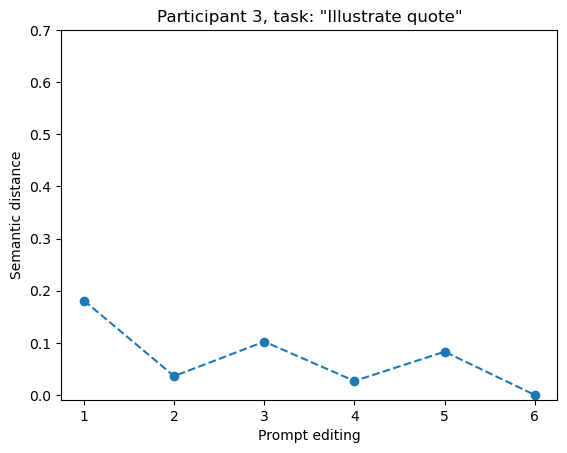

In [124]:
#time
time = [1,2,3,4,5,6]

# Create a scatter plot of the semantic distances
plt.plot(time,cosine_distance_perprompt_per_p(s3p2), linestyle = 'dashed', marker = 'o')

# Add labels to the x and y axes
plt.xlabel("Prompt editing")
plt.ylabel("Semantic distance")
plt.title('Participant 3, task: Illustrate quote')
plt.ylim(ymax=0.7)

# Show the plot
plt.show()

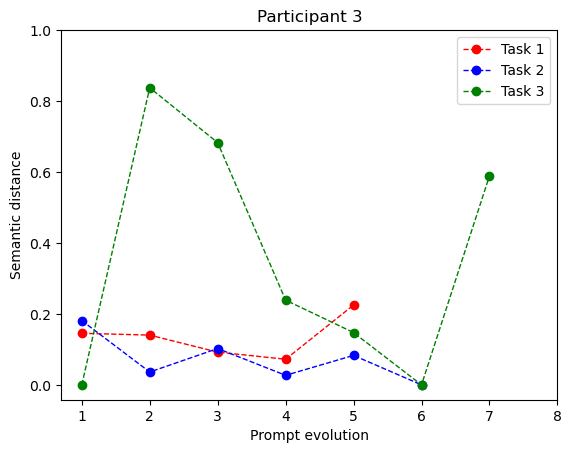

In [133]:

# Create a figure and a subplot
fig, ax = plt.subplots()

time = [1,2,3,4,5]
time2 = [1,2,3,4,5,6]
time3 = [1,2,3,4,5,6,7]

# Plot the first trajectory
ax.plot(time,cosine_distance_perprompt_per_p(s3p1), color='red', linestyle='dashed', linewidth=1, label='Task 1', marker = 'o')
# Plot the second trajectory
ax.plot(time2, cosine_distance_perprompt_per_p(s3p2), color='blue', linestyle='dashed', linewidth=1, label='Task 2', marker = 'o')
# Plot the third trajectory
ax.plot(time3, cosine_distance_perprompt_per_p(s3p3), color='green', linestyle='dashed', linewidth=1, label='Task 3', marker = 'o')

# Set the title and labels of the plot
ax.set_title('Participant 3')
ax.set_xlabel('Prompt evolution')
ax.set_ylabel('Semantic distance')

# Show the legend
ax.legend()

plt.ylim(ymax=1)
plt.xlim(xmax = 8)


# Show the plot
plt.show()




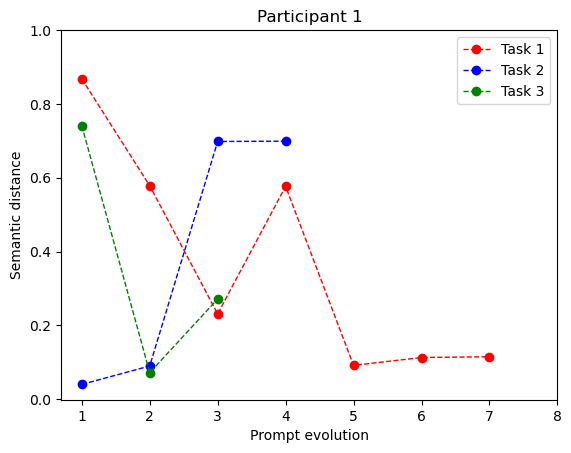

In [134]:
# Create a figure and a subplot
fig, ax = plt.subplots()

time = [1,2,3,4,5,6,7]
time2 = [1,2,3,4]
time3 = [1,2,3]

# Plot the first trajectory
ax.plot(time,cosine_distance_perprompt_per_p(s1p1), color='red', linestyle='dashed', linewidth=1, label='Task 1', marker = 'o')
# Plot the second trajectory
ax.plot(time2, cosine_distance_perprompt_per_p(s1p2), color='blue', linestyle='dashed', linewidth=1, label='Task 2', marker = 'o')
# Plot the third trajectory
ax.plot(time3, cosine_distance_perprompt_per_p(s1p3), color='green', linestyle='dashed', linewidth=1, label='Task 3', marker = 'o')

# Set the title and labels of the plot
ax.set_title('Participant 1')
ax.set_xlabel('Prompt evolution')
ax.set_ylabel('Semantic distance')

# Show the legend
ax.legend()

plt.ylim(ymax=1)
plt.xlim(xmax = 8)


# Show the plot
plt.show()



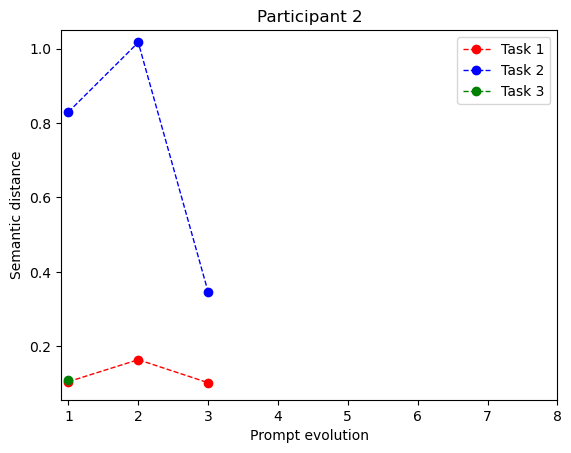

In [135]:
# Create a figure and a subplot
fig, ax = plt.subplots()

time = [1,2,3]
time2 = [1,2,3]
time3 = [1]

# Plot the first trajectory
ax.plot(time,cosine_distance_perprompt_per_p(s2p1), color='red', linestyle='dashed', linewidth=1, label='Task 1', marker = 'o')
# Plot the second trajectory
ax.plot(time2, cosine_distance_perprompt_per_p(s2p2), color='blue', linestyle='dashed', linewidth=1, label='Task 2', marker = 'o')
# Plot the third trajectory
ax.plot(time3, cosine_distance_perprompt_per_p(s2p3), color='green', linestyle='dashed', linewidth=1, label='Task 3', marker = 'o')

# Set the title and labels of the plot
ax.set_title('Participant 2')
ax.set_xlabel('Prompt evolution')
ax.set_ylabel('Semantic distance')

# Show the legend
ax.legend()

plt.ylim(ymax=1.05)
plt.xlim(xmax = 8)
# Show the plot
plt.show()



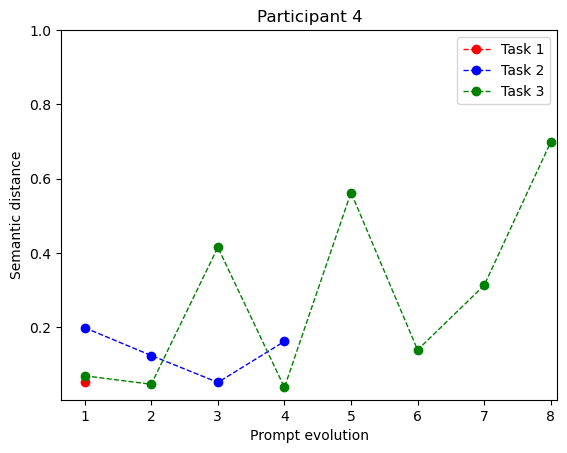

In [139]:
# Create a figure and a subplot
fig, ax = plt.subplots()

time = [1]
time2 = [1,2,3,4]
time3 = [1,2,3,4,5,6,7,8]

# Plot the first trajectory
ax.plot(time,cosine_distance_perprompt_per_p(s4p1), color='red', linestyle='dashed', linewidth=1, label='Task 1', marker = 'o')
# Plot the second trajectory
ax.plot(time2, cosine_distance_perprompt_per_p(s4p2), color='blue', linestyle='dashed', linewidth=1, label='Task 2', marker = 'o')
# Plot the third trajectory
ax.plot(time3, cosine_distance_perprompt_per_p(s4p3), color='green', linestyle='dashed', linewidth=1, label='Task 3', marker = 'o')

# Set the title and labels of the plot
ax.set_title('Participant 4')
ax.set_xlabel('Prompt evolution')
ax.set_ylabel('Semantic distance')

# Show the legend
ax.legend()
plt.xlim(xmax = 8.1)
plt.ylim(ymax = 1)

# Show the plot
plt.show()



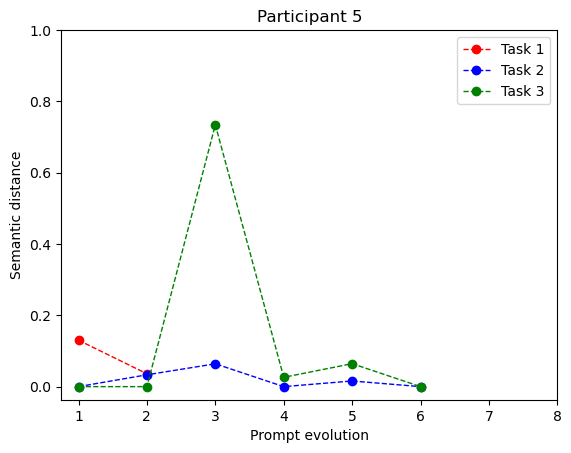

In [140]:
# Create a figure and a subplot
fig, ax = plt.subplots()

time = [1,2]
time2 = [1,2,3,4,5,6]
time3 = [1,2,3,4,5,6]

# Plot the first trajectory
ax.plot(time,cosine_distance_perprompt_per_p(s5p1), color='red', linestyle='dashed', linewidth=1, label='Task 1', marker = 'o')
# Plot the second trajectory
ax.plot(time2, cosine_distance_perprompt_per_p(s5p2), color='blue', linestyle='dashed', linewidth=1, label='Task 2', marker = 'o')
# Plot the third trajectory
ax.plot(time3, cosine_distance_perprompt_per_p(s5p3), color='green', linestyle='dashed', linewidth=1, label='Task 3', marker = 'o')

# Set the title and labels of the plot
ax.set_title('Participant 5')
ax.set_xlabel('Prompt evolution')
ax.set_ylabel('Semantic distance')

# Show the legend
ax.legend()

plt.xlim(xmax = 8)
plt.ylim(ymax = 1)

# Show the plot
plt.show()



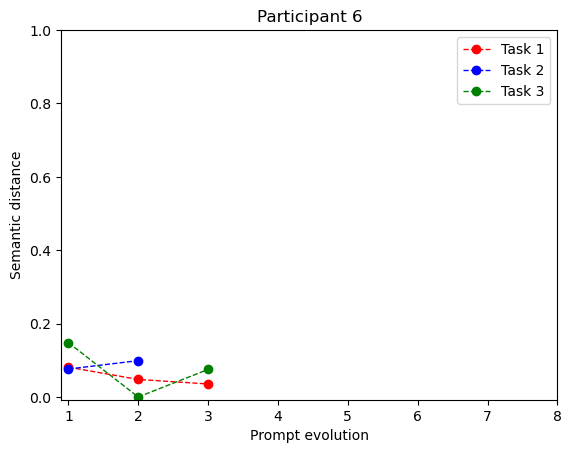

In [141]:
# Create a figure and a subplot
fig, ax = plt.subplots()

time = [1,2,3]
time2 = [1,2]
time3 = [1,2,3]

# Plot the first trajectory
ax.plot(time,cosine_distance_perprompt_per_p(s6p1), color='red', linestyle='dashed', linewidth=1, label='Task 1', marker = 'o')
# Plot the second trajectory
ax.plot(time2, cosine_distance_perprompt_per_p(s6p2), color='blue', linestyle='dashed', linewidth=1, label='Task 2', marker = 'o')
# Plot the third trajectory
ax.plot(time3, cosine_distance_perprompt_per_p(s6p3), color='green', linestyle='dashed', linewidth=1, label='Task 3', marker = 'o')

# Set the title and labels of the plot
ax.set_title('Participant 6')
ax.set_xlabel('Prompt evolution')
ax.set_ylabel('Semantic distance')

# Show the legend
ax.legend()

plt.xlim(xmax = 8)
plt.ylim(ymax = 1)
# Show the plot
plt.show()



In [119]:
cosine_distance_perprompt_per_p(s3p2)

[0.1811630129814148,
 0.036199986934661865,
 0.1024249792098999,
 0.026901841163635254,
 0.08307164907455444,
 0]